In [81]:
# working code to plot the nodes and connect to desired amount of neighbouring nodes
# added ignore list
# removed duplicated node locations

import pandas as pd
from geopy.distance import distance
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from heapq import nsmallest

# Define the number of nodes to create connections for
num_connections = 5

ignore_list = [(36.068619, -115.211891),(35.759998,-115.760002),(35.650002,-115.650002), (41.2345, -112.6789), (42.3456, -113.7890)]

data = pd.read_csv('./detector/detectors2018.csv')

#data = data.dropna(subset=['latitude', 'longitude'])  # Drop rows with missing values in lat/long
latitude = data.iloc[:, 5].astype(str).apply(lambda x: float(x[:2] + '.' + x[2:]))
longitude = data.iloc[:, 6].astype(str).apply(lambda x: float(x[:4] + '.' + x[4:]))
ids = data.iloc[:, 1]

locations, index = np.unique(np.column_stack((latitude, longitude)), axis=0, return_index=True)
ids = ids[index]

# Check if each location is in the ignore list and remove it if it is
mask = [tuple(loc) not in ignore_list for loc in locations]
locations = locations[mask]
ids = ids[mask]

# Calculate the distance matrix between all remaining locations
dist_matrix = distance_matrix(locations, locations)

graph = {}

for i in range(len(locations)):
    graph[i] = []

# Connect each node to the closest num_connections nodes
for i in range(len(locations)):
    closest = nsmallest(num_connections+1, range(len(dist_matrix[i])), key=lambda x: dist_matrix[i][x])
    closest.remove(i)
    for j in closest:
        distance_km = distance(locations[i], locations[j]).kilometers
        graph[i].append((j, distance_km))



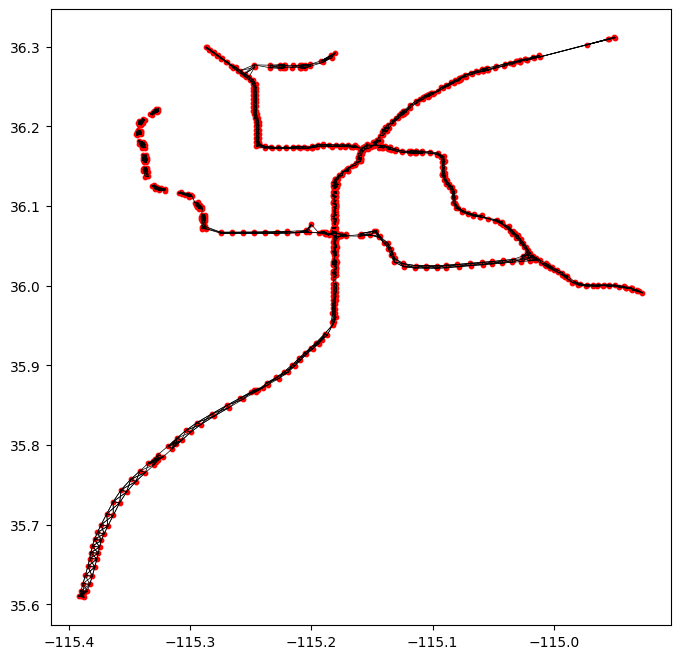

In [82]:
# Plot the graph with the set amount of edges
plt.figure(figsize=(8, 8))
for i in range(len(locations)):
    for j, distance in graph[i]:
        plt.plot([locations[i][1], locations[j][1]], [locations[i][0], locations[j][0]], 'k-', linewidth=0.5)
plt.scatter(locations[:,1], locations[:,0], s=10, c='r')
plt.show()

In [83]:
# Print the adjacency list
for node in graph:
    for neighbor, distance in graph[node]:
        print(f"{node} {neighbor} {distance:.2f} km")

0 3 0.25 km
0 2 0.33 km
0 1 0.42 km
0 4 0.61 km
0 5 0.64 km
1 2 0.14 km
1 3 0.26 km
1 0 0.42 km
1 4 0.50 km
1 5 0.61 km
2 3 0.12 km
2 1 0.14 km
2 0 0.33 km
2 4 0.41 km
2 5 0.50 km
3 2 0.12 km
3 0 0.25 km
3 1 0.26 km
3 4 0.39 km
3 5 0.45 km
4 5 0.14 km
4 7 0.31 km
4 3 0.39 km
4 2 0.41 km
4 1 0.50 km
5 4 0.14 km
5 7 0.33 km
5 6 0.32 km
5 3 0.45 km
5 2 0.50 km
6 5 0.32 km
6 4 0.46 km
6 7 0.49 km
6 3 0.73 km
6 2 0.80 km
7 4 0.31 km
7 5 0.33 km
7 6 0.49 km
7 2 0.68 km
7 3 0.69 km
8 9 0.51 km
8 6 0.98 km
8 10 1.14 km
8 7 1.13 km
8 5 1.24 km
9 8 0.51 km
9 7 1.03 km
9 6 1.12 km
9 11 1.16 km
9 5 1.27 km
10 11 0.54 km
10 8 1.14 km
10 12 1.30 km
10 9 1.23 km
10 13 1.42 km
11 10 0.54 km
11 9 1.16 km
11 13 1.27 km
11 8 1.30 km
11 12 1.36 km
12 13 0.52 km
12 14 1.12 km
12 15 1.25 km
12 10 1.30 km
12 11 1.36 km
13 12 0.52 km
13 15 1.10 km
13 11 1.27 km
13 14 1.21 km
13 10 1.42 km
14 15 0.54 km
14 16 0.81 km
14 17 1.01 km
14 12 1.12 km
14 13 1.21 km
15 14 0.54 km
15 17 0.84 km
15 16 0.97 km
15 13 1.10